In [1]:
# Import

import numpy as np

# LSTM

# Formulas

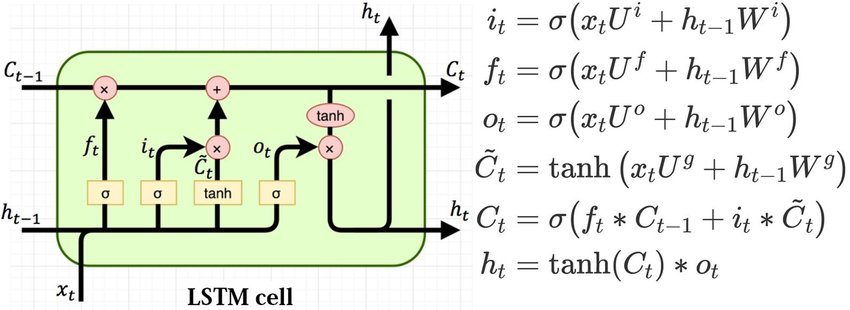

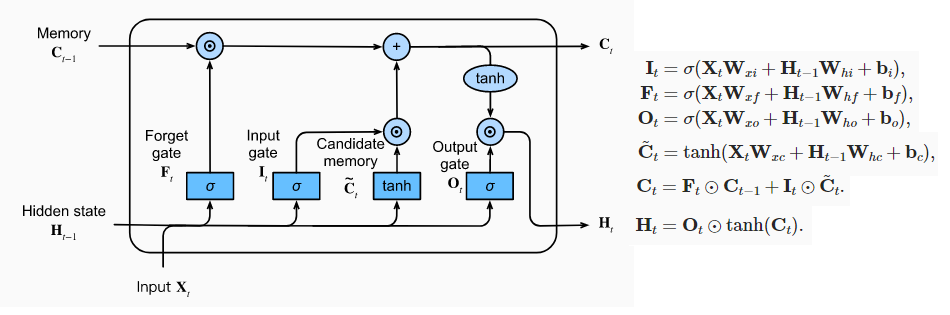

In [2]:
# Parameters setting

num_units=64
num_samples = step = 40
num_inputs = 1
num_output = num_classes = 3

In [3]:
# Weights initializing

# x = num_samples * num_inputs = 40 *1
# H = num_inputs * num_units = 1 * 64
# C = num_inputs * num_units = 1 * 64

def initialize_params(num_inputs, num_units, num_output):

    def normal_values_generation(shape):
        return np.random.normal(0, 1, size = shape)

    def weights_matrix_dimensions():
        return (normal_values_generation((num_inputs, num_units)),
                normal_values_generation((num_units, num_units)),
                normal_values_generation(num_units))

    W_xf, W_hf, b_f = weights_matrix_dimensions()  # Forget gate parameters
    W_xi, W_hi, b_i = weights_matrix_dimensions()  # Input gate parameters
    W_xo, W_ho, b_o = weights_matrix_dimensions()  # Output gate parameters
    W_xc_tilda, W_hc_tilda, b_c_tilda = weights_matrix_dimensions() # Candidate memory parameters
 
    # Output dense layer parameters
    W_d = normal_values_generation((num_units, num_output))
    b_d = normal_values_generation(num_output)

    params = [W_xf, W_hf, b_f, W_xi, W_hi, b_i, W_xo, W_ho, b_o, W_xc_tilda, W_hc_tilda, b_c_tilda, W_d, b_d]
    
    return params

In [4]:
# LSTM implementation

def lstm(inputs, params):
    W_xf, W_hf, b_f, W_xi, W_hi, b_i, W_xo, W_ho, b_o, W_xc_tilda, W_hc_tilda, b_c_tilda, _, _= params
    H = np.random.normal(0, 1, size =(num_inputs, num_units))
    C = np.random.normal(0, 1, size =(num_inputs, num_units))

    for x in inputs:
        x = np.reshape(x, [-1, W_xf.shape[0]])

        # Forget gate
        F = 1 / (1 + np.exp(-(np.matmul(x, W_xf) + np.matmul(H, W_hf) + b_f)))

        # Input gate
        I = 1 / (1 + np.exp(-(np.matmul(x, W_xi) + np.matmul(H, W_hi) + b_i)))

        # Candidate state
        input_C_tilda = np.matmul(x, W_xc_tilda) + np.matmul(H, W_hc_tilda) + b_c_tilda
        C_tilda = (np.exp(input_C_tilda) - np.exp(-input_C_tilda)) / (np.exp(input_C_tilda) + np.exp(-input_C_tilda))

        # Output gate
        O = 1 / (1 + np.exp(-(np.matmul(x, W_xo) + np.matmul(H, W_ho) + b_o)))

        # C output
        C = (F * C) + (I * C_tilda)

        # H output
        H = O * (np.exp(C) - np.exp(-C)) / (np.exp(C) + np.exp(-C))

    return H

In [5]:
# Inference on Sine Signal

N = 40
t = np.arange(0, N)

x = np.sin(t * 0.02)/2 + np.random.uniform(-0.05, 0.05, N)

params = initialize_params(num_inputs, num_units, num_output)
lstm_output = lstm(x, params)

_, _, _, _, _, _, _, _, _, _, _, _, W_d, b_d = params

dense_layer_output = np.matmul(lstm_output, W_d) + b_d
final_output = np.exp(dense_layer_output) / np.sum(np.exp(dense_layer_output))
predict = np.argmax(final_output)

print("dense layey output: ", dense_layer_output)
print("softmax output: ", final_output)
print("class predicted: ", predict)


dense layey output:  [[-0.9917474  -4.32029175  1.95376574]]
softmax output:  [[0.04985973 0.00178723 0.94835303]]
class predicted:  2
